1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

2. Reading the data

In [3]:
data = pd.read_csv('healthcare_dataset.csv.zip')

In [4]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
data.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [7]:
data.shape

(55500, 15)

In [8]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [10]:
data.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [11]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
55495,False
55496,False
55497,False
55498,False


In [12]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

4. Data Preproessing

In [14]:
#Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [15]:
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Blood Type'] = label_encoder.fit_transform(data['Blood Type'])
data['Medical Condition'] = label_encoder.fit_transform(data['Medical Condition'])
data['Medication'] = label_encoder.fit_transform(data['Medication'])
data['Insurance Provider'] = label_encoder.fit_transform(data['Insurance Provider'])
data['Admission Type'] = label_encoder.fit_transform(data['Admission Type'])
data['Test Results'] = label_encoder.fit_transform(data['Test Results'])


5. spilting the data

In [17]:
X = data[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication', 'Insurance Provider', 'Admission Type', 'Test Results']]
y = data['Test Results']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6 - Building the model

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [21]:
#predicting
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 2, 0, 2])

7. Evaluating the model


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [23]:
#compute confuison matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3754    0    0]
 [   0 3617    0]
 [   0    0 3729]]


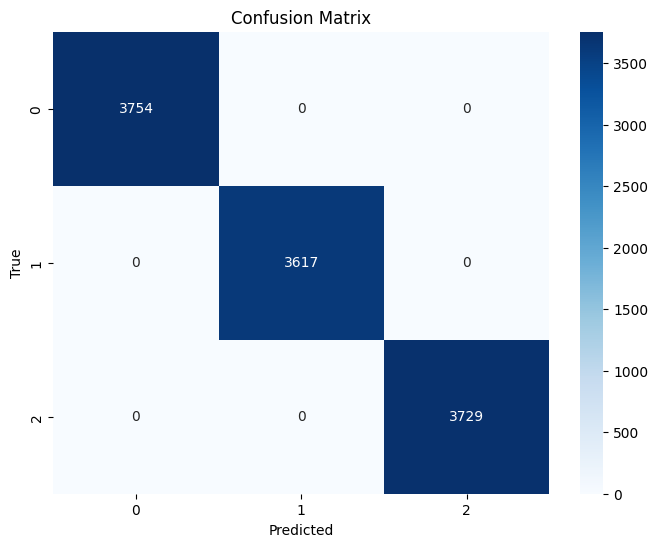

In [24]:
#plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

8. Data Visualisation

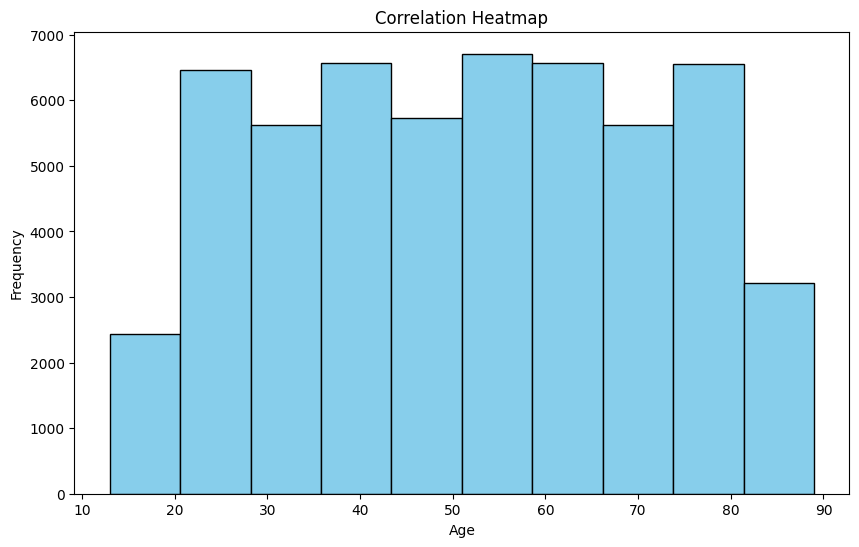

In [28]:
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Correlation Heatmap')
plt.show()

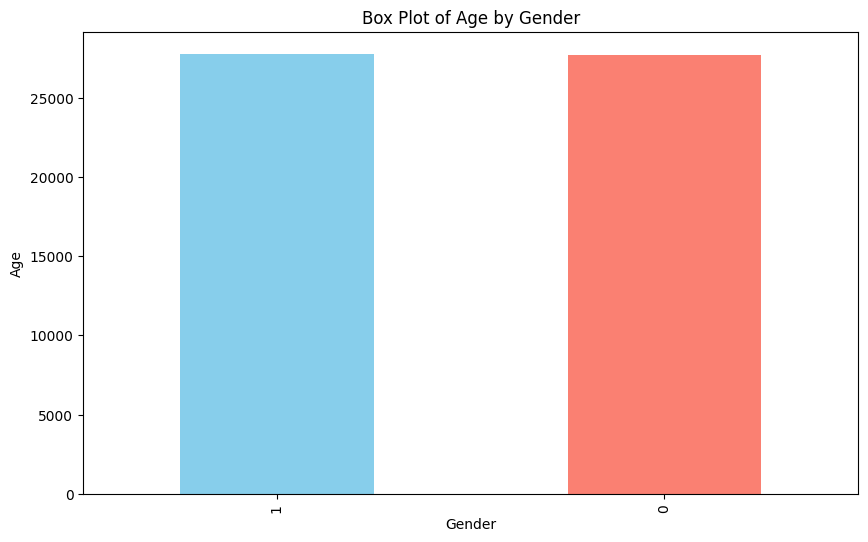

In [29]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Box Plot of Age by Gender')
plt.show()

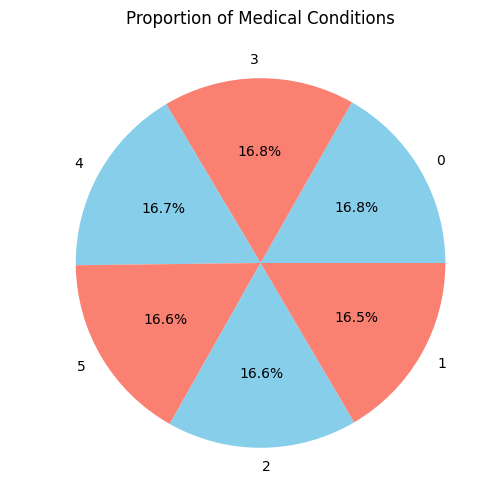

In [35]:
plt.figure(figsize=(10, 6))
df['Medical Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportion of Medical Conditions')
plt.ylabel(' ')
plt.show()

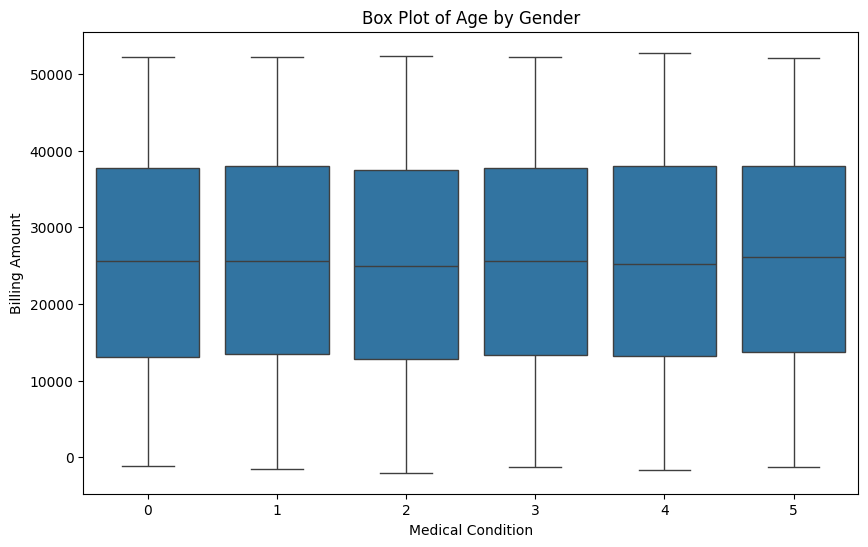

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Box Plot of Age by Gender')
plt.show()

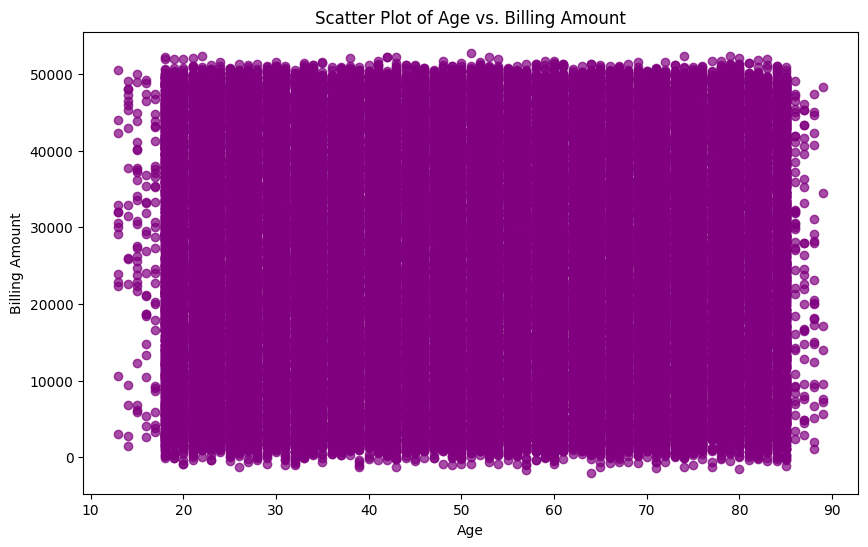

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Billing Amount'], alpha=0.7, color='purple')
plt.title('Scatter Plot of Age vs. Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()

<ipython-input-40-d51699edbf6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission Type', data=df, palette='pastel')


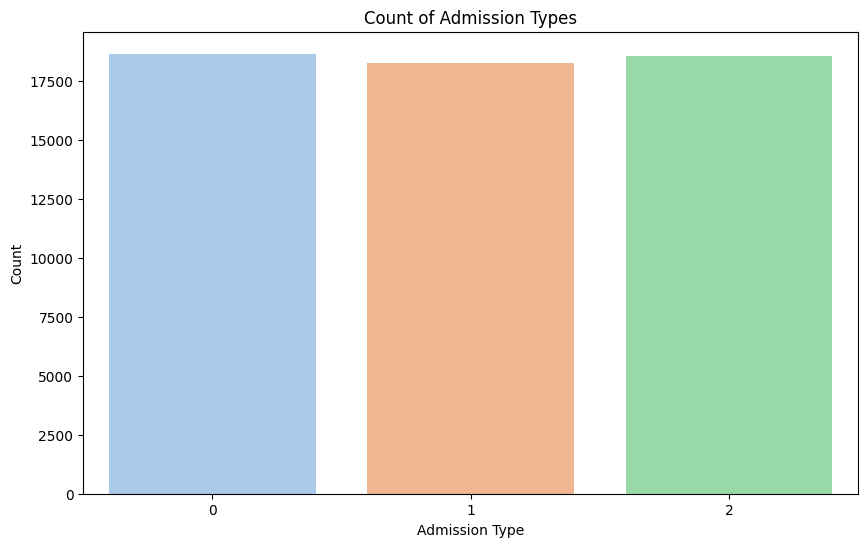

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Admission Type', data=df, palette='pastel')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Count of Admission Types')
plt.show()

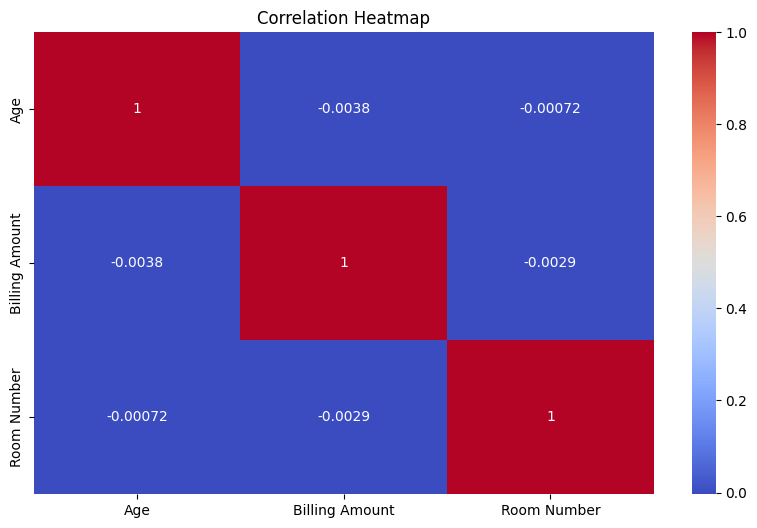

In [43]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Age','Billing Amount', 'Room Number']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()